In [ ]:
ta 

# Capstone Project

In this Capstone Project you will be engaging with the stock price data from MSN Money, which can be found at:  
`../../data/histroical-stock-prices.csv`  
In this Notebook we will be looking at Pairs Trading.  

## Outline: 
1. Getting and describing the data. 

2. Exploring, cleaning and visualizing the data

3. Developing analytics
- Using Correlation
- Using Cointegration (optional)

4. Testing and Sanity Checking

5. Extending the scope
- Ideas for further strategies
- Devloping analytics
    
6. Risk review: improving accuracy and realism
- Time keeps on ticking into the future
- Operational concerns

7. Wrapping up

## Options
As we progress you are encouraged to take this dataset further.  You are also encouraged to explore any aspects of the data. Develop your own algorithms.  Be explicit about your inquiry and success in predicting affects on our world.

## Warning: Not financial advice
This exercise is meant purely for educational purposes, uses many simplifications and is not intended, nor should be considered as financial advice. There are many risks involved in implementation of financial trading strategies that are not considered nor described here. 

## 0. Overview
Pairs trading is a type of statistical arbitrage, which is exploiting statistical properties that we believe can make money if they continue.  
General Idea:
1) Fine two stocks which move similarly.
2) Find where the prices move apart.
3) Sell the high one and buy the low one.
4) Wait for them to come back into line.

## 1. Getting and Describing the data.

First we load the data.

In [1]:
# Import our tools
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This can be a large data set.  if you wish to only load a portion, set nrows to something like 10000
rows = None
stocks = pd.read_csv('../../data/daily-historical-stock-prices-1970-2018/historical_stock_prices.csv', nrows=rows)
# TODO update to msn data file 

In [ ]:
!ls ../../data/daily-historical-stock-prices-1970-2018

In [3]:
# TODO remove these cells that makes the data identical to the MSN data.  
stocks['dt'] = pd.to_datetime(stocks['date'])

In [4]:
stocks.head()# stocks = stocks[stocks['dt']>='20130101']

,ticker,open,close,adj_close,low,high,volume,date,dt
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14,2013-05-14


In [5]:
stocks = stocks[stocks['dt']>='2013-01-01']

In [6]:
# TODO back on the main path

In [7]:
# Let's look at the data!
stocks.head()

,ticker,open,close,adj_close,low,high,volume,date,dt
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14,2013-05-14


In [46]:
# And another way we discussed
stocks.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6671799 entries, 0 to 20973888
Data columns (total 9 columns):
ticker       6671799 non-null object
open         6671799 non-null float64
close        6671799 non-null float64
adj_close    6671799 non-null float64
low          6671799 non-null float64
high         6671799 non-null float64
volume       6671799 non-null int64
date         6671799 non-null object
dt           6671799 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 829.0+ MB


### Thought Questions: 
Which of the above ways of looking at the data is the most helpful.  What have you learned from each?

What do you see that is unusual about the 'date' column? 

What datatype should they be stored as? 

In [44]:
# And yet one more:
stocks.describe()

,open,close,adj_close,low,high,volume
count,6.671799e+06,6.671799e+06,6.671799e+06,6.671799e+06,6.671799e+06,6.671799e+06
mean,6.855818e+01,6.859667e+01,6.656953e+01,6.711589e+01,7.019036e+01,1.150345e+06
std,2.111215e+03,2.147530e+03,2.139130e+03,2.044691e+03,2.255262e+03,1.574015e+07
min,1.000000e-03,1.000000e-03,1.579543e-05,1.000000e-03,1.000000e-03,1.000000e+00
25%,1.064000e+01,1.063000e+01,9.700000e+00,1.047000e+01,1.081000e+01,3.540000e+04
50%,2.131000e+01,2.131000e+01,1.955737e+01,2.102000e+01,2.160000e+01,1.698000e+05
75%,4.138000e+01,4.139000e+01,3.911000e+01,4.088000e+01,4.188000e+01,6.975000e+05
max,1.375000e+06,1.347500e+06,1.347500e+06,1.300000e+06,1.542500e+06,4.214620e+09


Exercise: Pandas has good datetime functionality. Convert your dates using pd.datetime. 


In [ ]:
# Code in this cell ... assign a new column stocks['dt']

Philosophical aside: You may wonder why we use a new column rather than modifying stocks['date'].  This is a matter of personal preference and a trade-off.  Many data scientists and engineers prefer to assign a new column because it makes the Jupyter notebook robust to running a cell twice.  The math term for this is idempotent.  It also makes our code more like data engineering pipeline code.  

In [13]:
# Lets gather the unique tickers we are working with.
tickers = stocks['ticker'].unique()

# What type do you expect tickers to be?
type(tickers)

numpy.ndarray

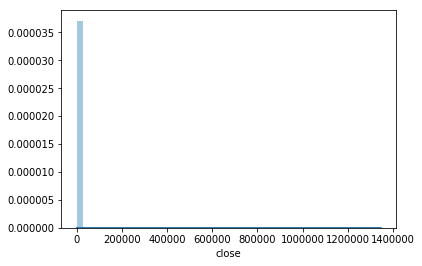

In [50]:
# Lets make some plots
sns.distplot(stocks['close'])


In [49]:
sample_tickers = list(tickers[1:10])
sample_tickers

['CRCM', 'APO', 'ISTR', 'GHDX', 'GTN', 'PEZ', 'FLWS', 'MHD', 'BRFS']

We typically use close data when working with daily market data because the open is sometimes affected by the dynamics of traders reacting to new information.  Let's reshape our data as well so that each date is our index and each colum is the data for one ticker.  

This aproach is called Tidy Data.  For more information on rearranging your data see TODO

### What do you see here? What does the above chart tell us about the distribution of prices?

In [ ]:
# 

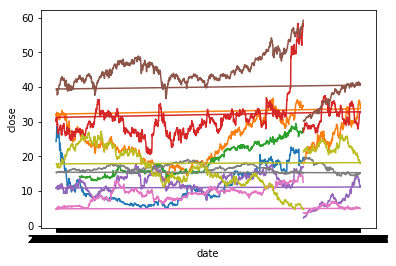

In [51]:

for tic in sample_tickers:
    plotdata = stocks[stocks['ticker']==tic]
    sns.lineplot(x='date', y='close', data=plotdata)
    # todo clean the dates view

In [42]:
closes = stocks.pivot(index='dt', columns='ticker', values='adj_close')

## Now that we have our data neatly arranged we can really dive into visualizing it.  

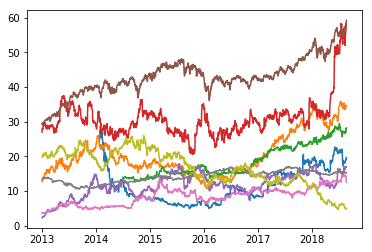

In [57]:
for tic in sample_tickers:
    sns.lineplot(data=closes[tic])


In [ ]:
trix

Now look for your own ideas graphed in the data.



## 3. Developing analytics -Correlation

Corelation is the statistical tendency of two variables to move together

### Which are the most corelated stocks?  Do you only want positive corelations? 
Select the top 100 for this exercise.  

### Exercise: Now make a correlation plot with each of the tickers. 
You will first need to rearrange the dataframe into using just the close data where each ticker is a column

In [ ]:
top100 = ''#    Fill this in. 

Now let's identify the top gainers.

### The problem with correlation
TOOD Referance the nonstationary problem

## 3. Developing analytics -Cointegration

Corelation is the statistical tendency of two variables to move together

## 4. Testing and Sanity Checking
- Backtesting
- Transation costs 


## 5. Your turn to move forward.

Links to LEARN portal
Links to academic papers.  Industry side.  
How 